In [ ]:
#İmport Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Load the dataset
df=pd.read_csv('russian-beverage-statistic.csv')

In [ ]:
#Let's display first 5 columns
df.head()

,Region,Year,Wine,Beer,Vodka,Sparkling wine,Brandy,Сider,Liqueurs,Total alcohol consumption (in liters of pure alcohol per capita)
0,Belgorod Oblast,2017,1.79,60.00,3.52,0.78,0.31,1.52,0.14,5.6
1,Bryansk Oblast,2017,3.02,34.21,4.29,0.83,0.46,0.86,0.69,4.8
2,Vladimir Oblast,2017,3.70,58.93,6.73,0.91,0.78,1.60,0.54,7.5
3,Voronezh Oblast,2017,2.68,33.17,3.69,1.04,0.60,0.91,0.32,4.4
4,Ivanovo Oblast,2017,3.42,41.01,5.69,0.83,0.60,1.36,0.61,5.9


In [ ]:
#Let's display last 5 columns
df.tail()

,Region,Year,Wine,Beer,Vodka,Sparkling wine,Brandy,Сider,Liqueurs,Total alcohol consumption (in liters of pure alcohol per capita)
590,Amur Oblast,2023,3.88,73.46,8.17,1.30,0.90,0.49,1.11,9.3
591,Magadan Oblast,2023,4.54,54.22,11.02,2.34,1.72,0.50,1.17,10.2
592,Sakhalin Oblast,2023,5.25,67.39,12.21,2.67,1.39,0.97,1.50,11.4
593,Jewish Autonomous Oblast,2023,3.08,82.91,8.68,1.00,0.73,0.62,1.43,10.0
594,Chukotka Autonomous Okrug,2023,3.23,50.08,10.46,1.45,1.60,0.30,0.66,8.3


In [ ]:
#I'll check out missing values
df.isnull().sum()

,0
Region,0
Year,0
Wine,0
Beer,0
Vodka,0
Sparkling wine,0
Brandy,0
Сider,0
Liqueurs,0
Total alcohol consumption (in liters of pure alcohol per capita),0


We have no missing values therefore we can examine this dataset.Let's find out that what we are going to see.

In [ ]:
#Let's take summary statistic data
df.describe()

,Year,Wine,Beer,Vodka,Sparkling wine,Brandy,Сider,Liqueurs,Total alcohol consumption (in liters of pure alcohol per capita)
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,2020.000000,3.347193,46.464454,5.555613,1.149160,0.788134,0.521311,0.620824,6.348067
std,2.001683,1.640570,17.246429,2.659072,0.629742,0.409611,0.361345,0.417862,2.451978
min,2017.000000,0.010000,0.000000,0.050000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,2018.000000,2.350000,38.295000,3.920000,0.770000,0.525000,0.270000,0.340000,5.200000
50%,2020.000000,3.220000,47.600000,5.310000,1.040000,0.720000,0.460000,0.570000,6.300000
75%,2022.000000,4.360000,56.020000,7.050000,1.460000,1.020000,0.700000,0.810000,7.900000
max,2023.000000,8.470000,116.630000,12.830000,3.360000,2.080000,2.520000,2.950000,12.400000


In [ ]:
#I would like to alter Total Alchol's name
df.rename(columns={'Total alcohol consumption (in liters of pure alcohol per capita)':'Total Alcohol'},inplace=True)

In [ ]:
#What we altered on dataset?Checking time
df.head()

,Region,Year,Wine,Beer,Vodka,Sparkling wine,Brandy,Сider,Liqueurs,Total Alcohol
0,Belgorod Oblast,2017,1.79,60.00,3.52,0.78,0.31,1.52,0.14,5.6
1,Bryansk Oblast,2017,3.02,34.21,4.29,0.83,0.46,0.86,0.69,4.8
2,Vladimir Oblast,2017,3.70,58.93,6.73,0.91,0.78,1.60,0.54,7.5
3,Voronezh Oblast,2017,2.68,33.17,3.69,1.04,0.60,0.91,0.32,4.4
4,Ivanovo Oblast,2017,3.42,41.01,5.69,0.83,0.60,1.36,0.61,5.9


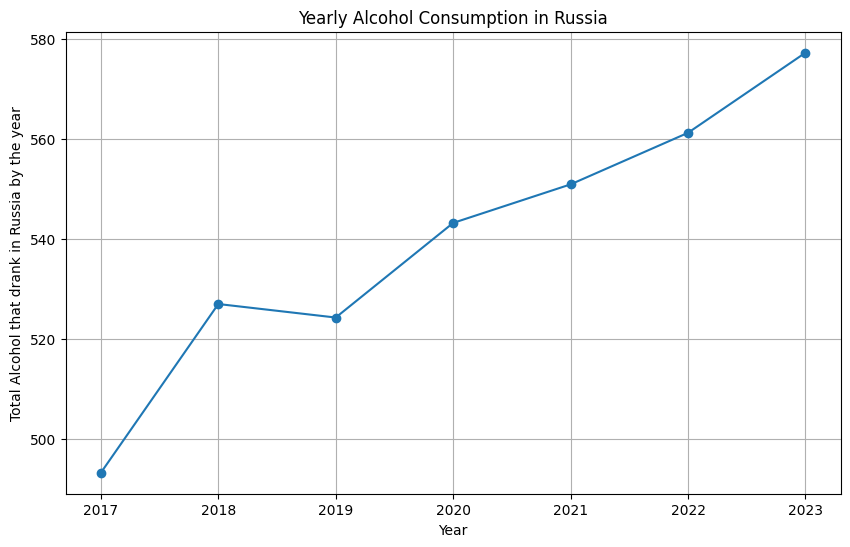

In [ ]:
#I'm going to assoicate year and Total Alcohol so I can find out how much alcohol were drank in Russia
yearly_alcohol=df.groupby('Year')['Total Alcohol'].sum()

#Let's make visulation for this request.
plt.figure(figsize=(10,6))
plt.plot(yearly_alcohol.index,yearly_alcohol.values,marker='o',linestyle='-')
plt.title('Yearly Alcohol Consumption in Russia')
plt.xlabel('Year')
plt.ylabel('Total Alcohol that drank in Russia by the year')
plt.grid(True)
plt.show()


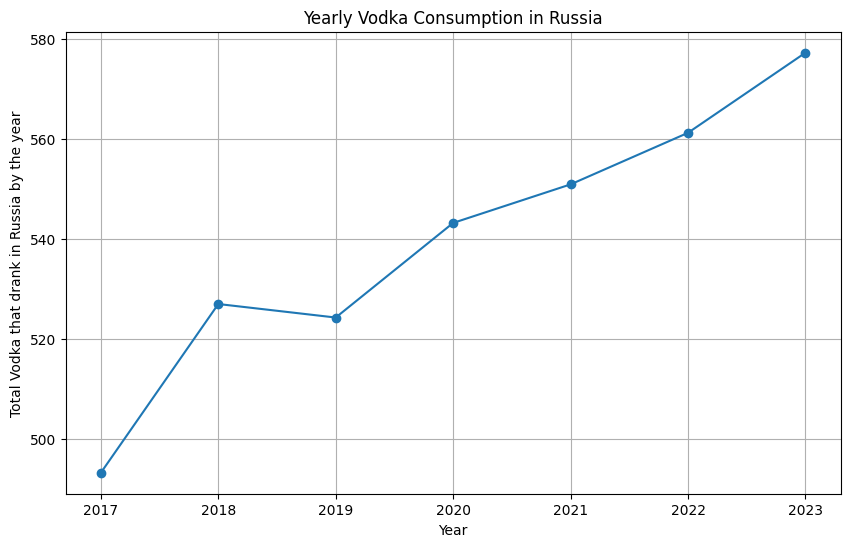

In [ ]:
#I'll discover that how much vodka were drank in Russia by year?
df.groupby('Year')['Vodka'].sum()

# Make a visulation
plt.figure(figsize=(10,6))
plt.plot(yearly_alcohol.index,yearly_alcohol.values,marker='o',linestyle='-')
plt.title('Yearly Vodka Consumption in Russia')
plt.xlabel('Year')
plt.ylabel('Total Vodka that drank in Russia by the year')
plt.grid(True)

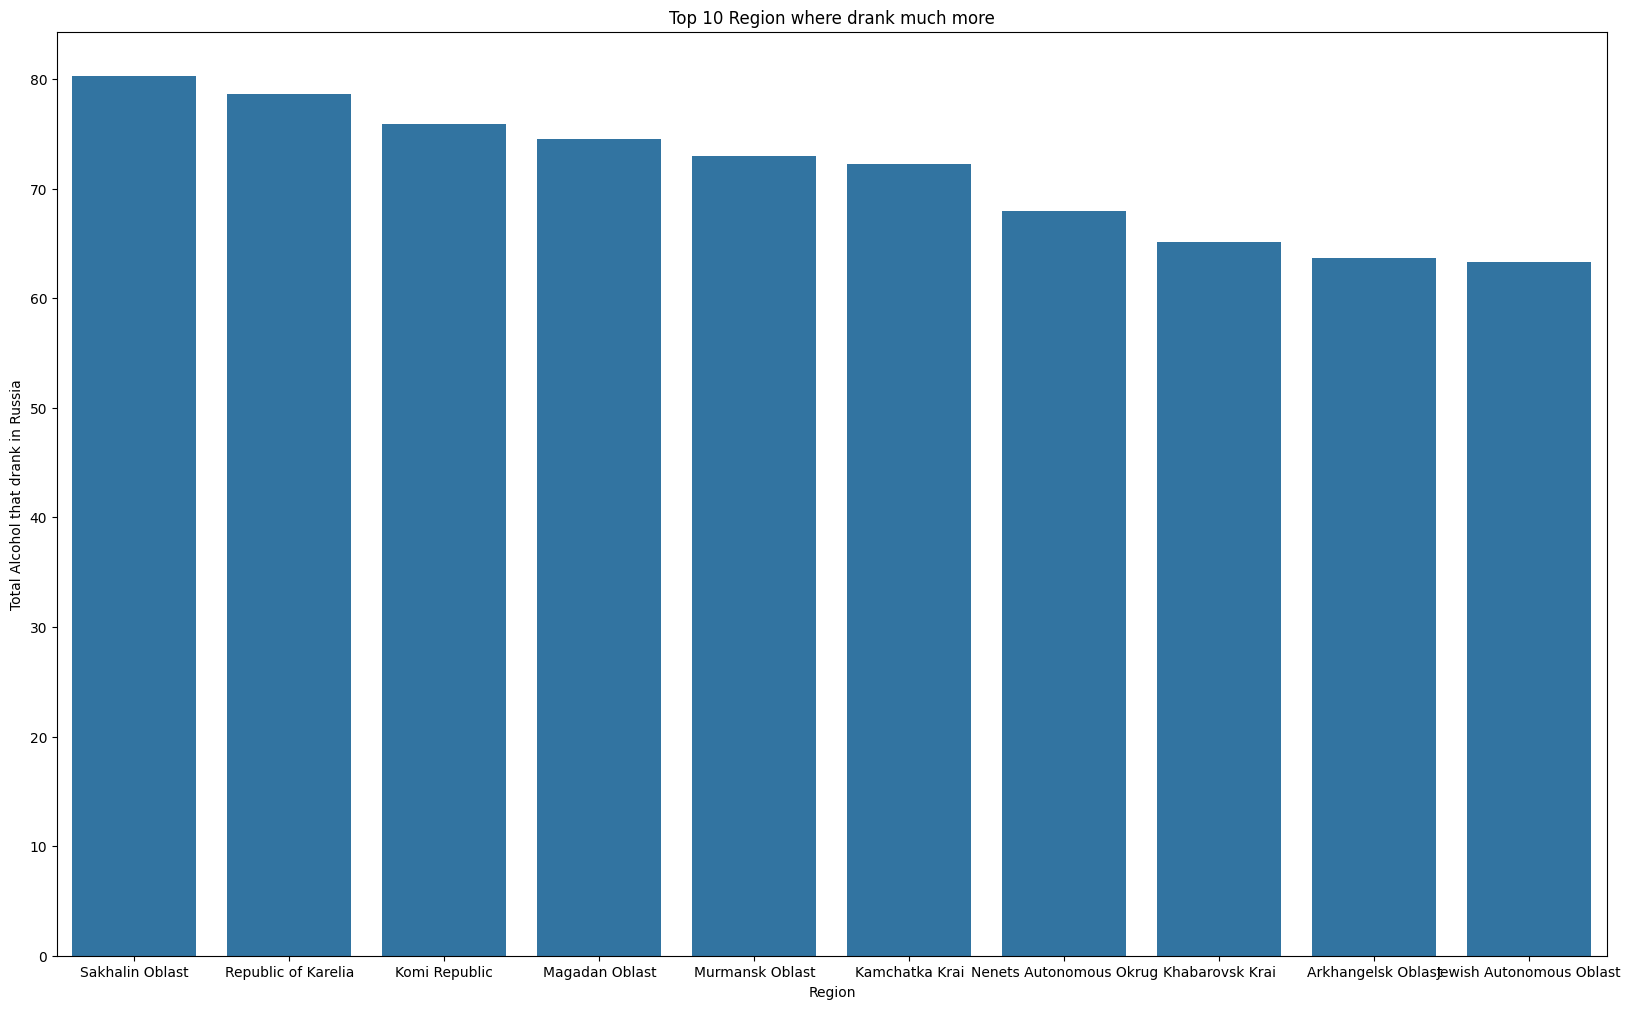

In [ ]:
#Regional Consumption in Russia
regional_consumption=df.groupby('Region')['Total Alcohol'].sum()

#Top 10 region where drank much more
top_10_region=regional_consumption.sort_values(ascending=False).head(10)

#Make a visulation
plt.figure(figsize=(20,12))
sns.barplot(x=top_10_region.index,y=top_10_region.values)
plt.title('Top 10 Region where drank much more')
plt.xlabel('Region')
plt.ylabel('Total Alcohol that drank in Russia')
plt.show()

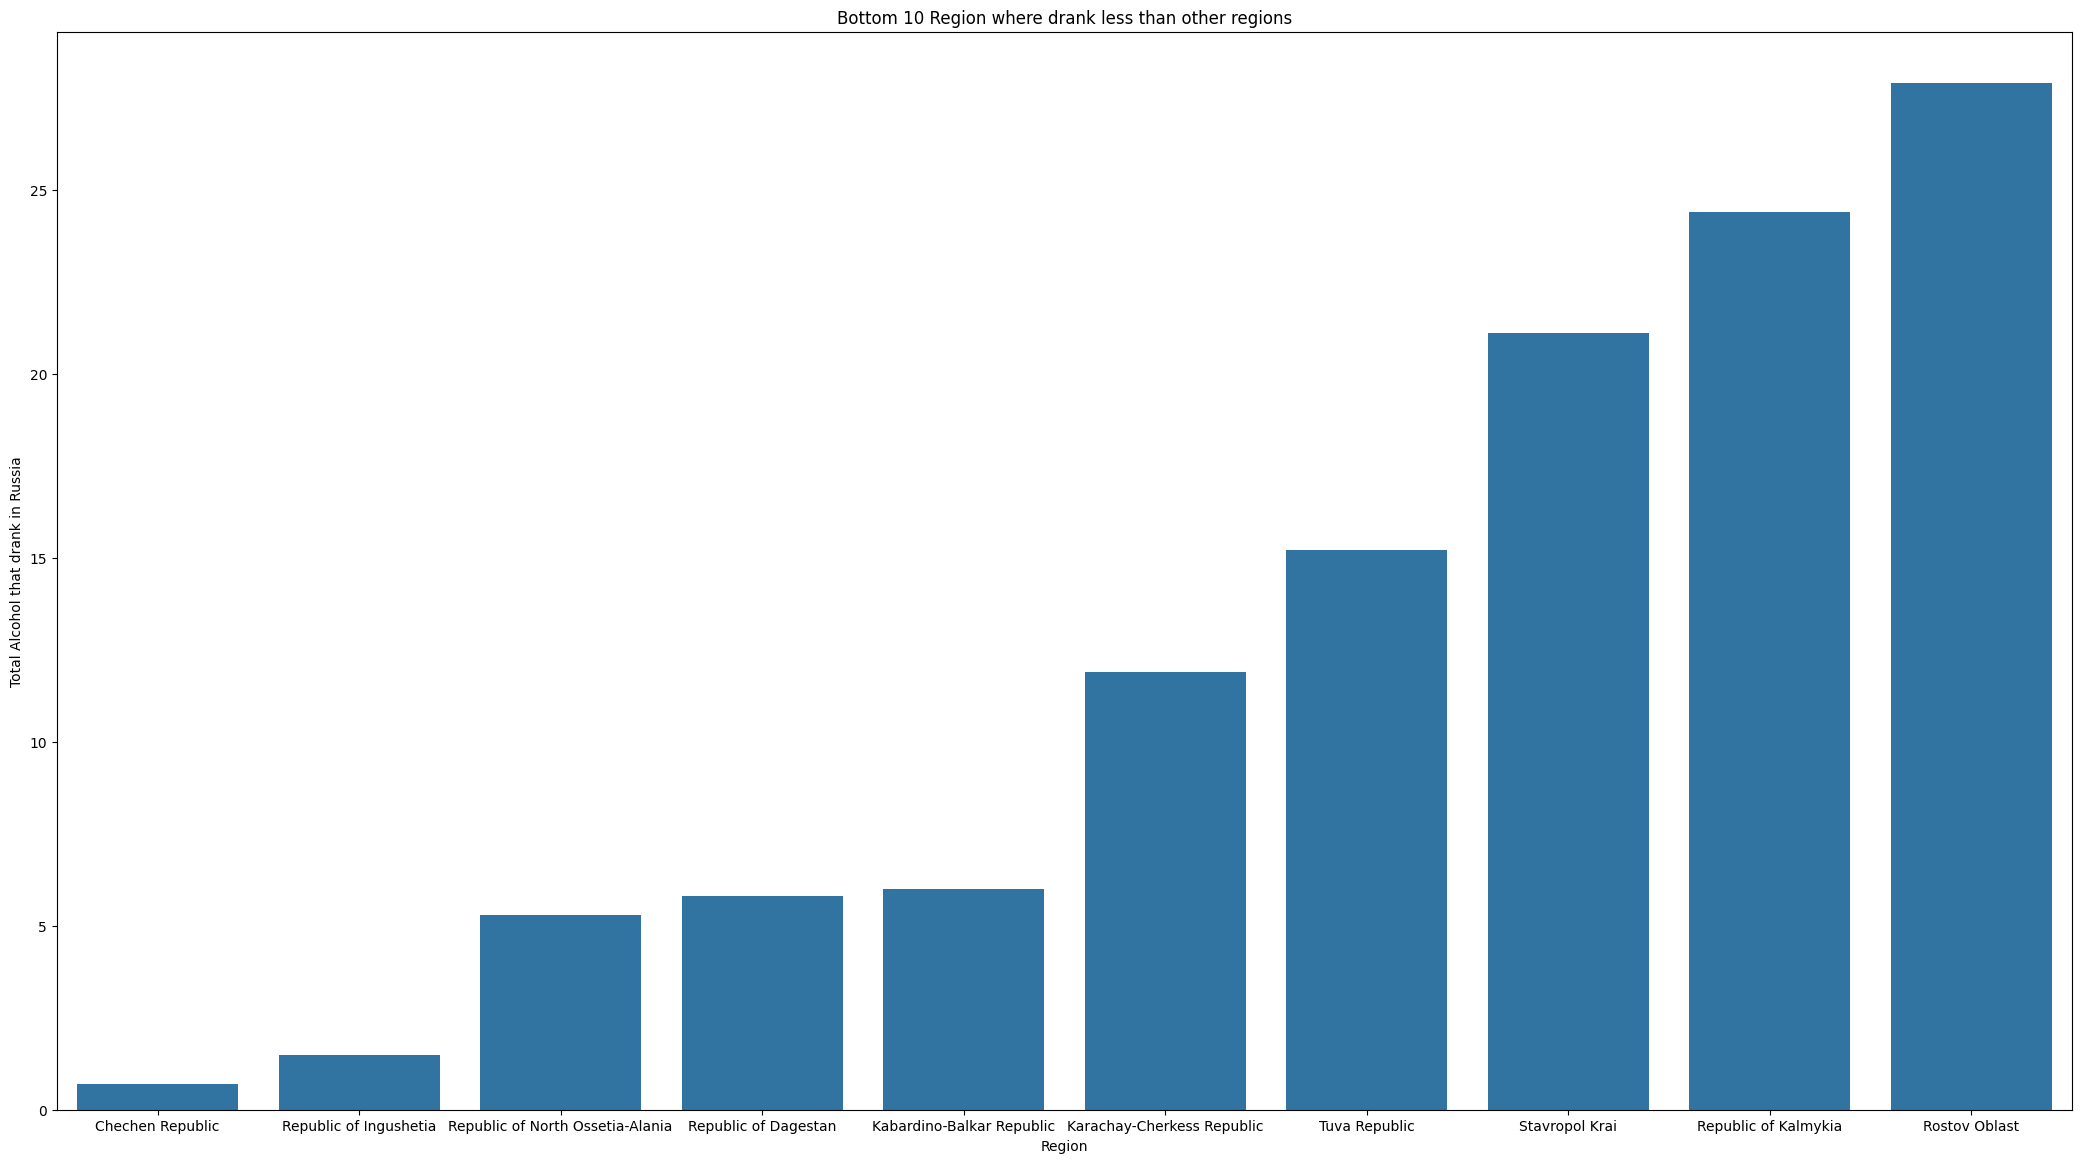

In [ ]:
#Let's find out top 10 region where drink less than other regions
bottom_regions = regional_consumption.nsmallest(10)

# Make a visulation
plt.figure(figsize=(26,14))
sns.barplot(x=bottom_regions.index,y=bottom_regions.values)
plt.title('Bottom 10 Region where drank less than other regions')
plt.xlabel('Region')
plt.ylabel('Total Alcohol that drank in Russia')
plt.show()

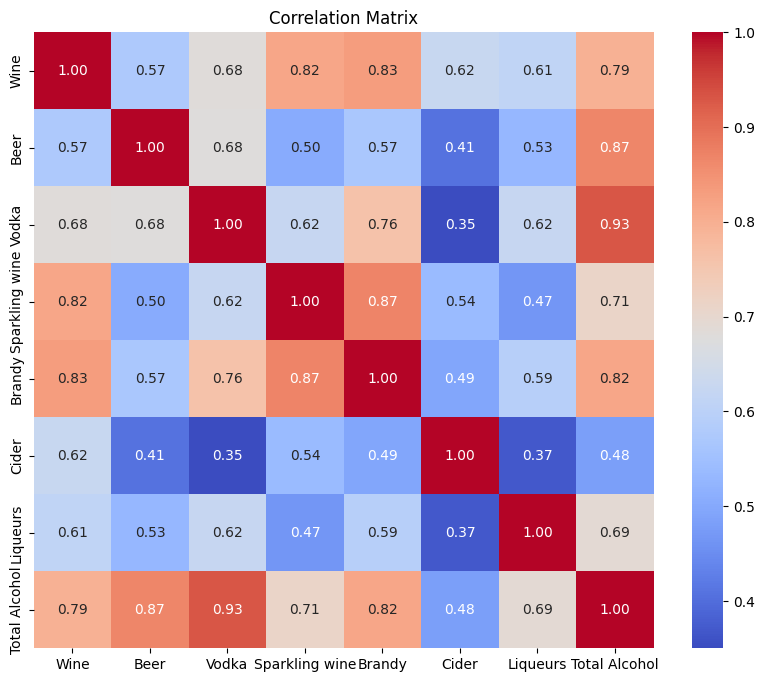

In [ ]:
#Correlation Matrix
correlation_matrix = df[['Wine', 'Beer', 'Vodka', 'Sparkling wine', 'Brandy', 'Сider', 'Liqueurs',
                           'Total Alcohol']].corr()

#Let's do correlation matrix visulation
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


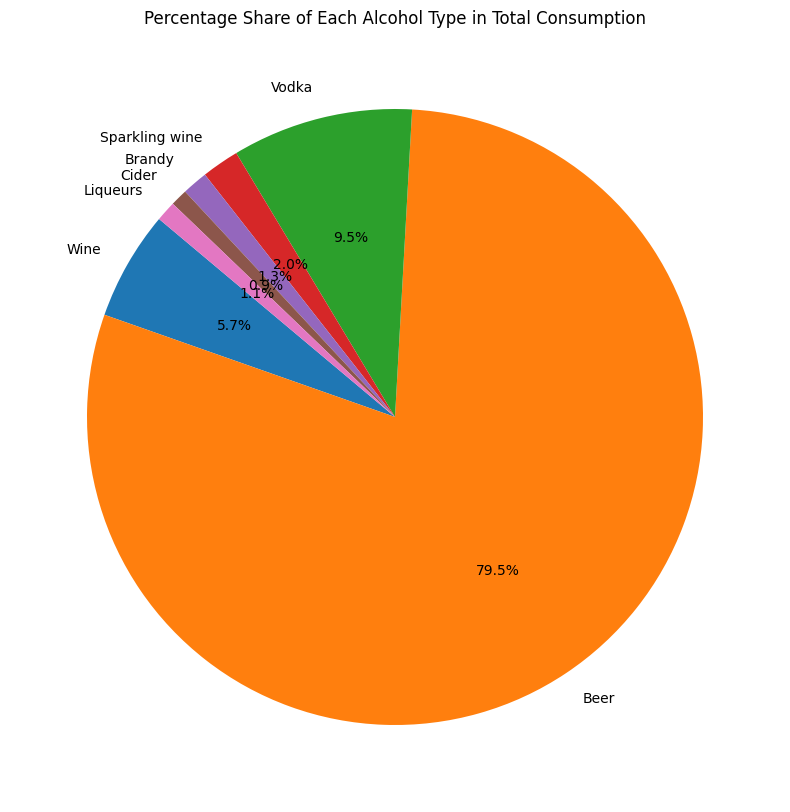

In [ ]:
# Total alcohol types by all years
total_consumption = df[['Wine', 'Beer', 'Vodka', 'Sparkling wine', 'Brandy', 'Сider', 'Liqueurs']].sum()
percentage_share = (total_consumption / total_consumption.sum()) * 100

# Visulation
plt.figure(figsize=(20, 10))
plt.pie(percentage_share, labels=total_consumption.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Share of Each Alcohol Type in Total Consumption')
plt.show()


In [ ]:
#Let's gain idea total beverage by category
total_consumption = df[['Wine', 'Beer', 'Vodka', 'Sparkling wine', 'Brandy', 'Сider', 'Liqueurs']].sum()

print(f'Total Consumption:{total_consumption}')

Total Consumption:Wine               1991.58
Beer              27646.35
Vodka              3305.59
Sparkling wine      683.75
Brandy              468.94
Сider               310.18
Liqueurs            369.39
dtype: float64
